In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/quora-train/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
37176,37176,67689,33663,What is sliding round in IPU?,What is sliding round in ipu and its process?,1
372569,372569,52345,83010,How will the new currency notes of denominatio...,Will demonetization of Rs. 500 & 1000 currency...,1
280531,280531,59819,26826,What are scripting languages and programming l...,What is the major difference between a scripti...,1
355943,355943,167481,485187,Why did Muhammad permit his followers to rape ...,"Why is it that SRK, who has little to no respo...",0
251284,251284,365356,107994,How do you let someone know you're not interes...,How do I know if someone is interested in me?,0
297817,297817,299854,135865,Who are the best app designers in San Francisc...,Who are the best mobile app designers in San F...,0
94767,94767,158178,158179,What are the tissues found in all mammalians?,Which is the best university in Canada for a m...,0
8369,8369,16320,16321,How many hairs should I shed each day?,How many hairs does a human shed each day?,0
148165,148165,233674,233675,How can I get rid of my acne scars?,How can I get rid of my acne and acne scars?,0
106815,106815,175875,175876,What caused the train crash in Hoboken on Sept...,Improve maths for Ssc?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['question1'].isnull().sum()

1

0    255027
1    149263
Name: is_duplicate, dtype: int64


<Axes: >

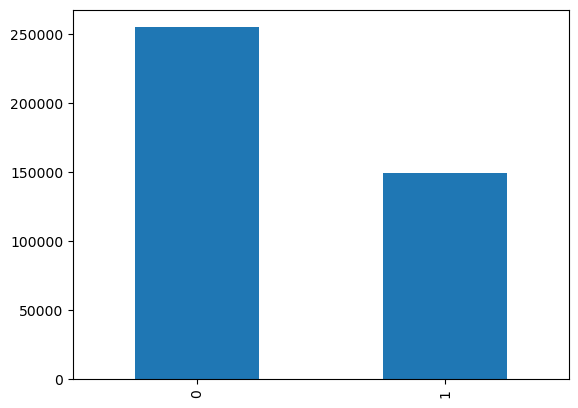

In [9]:
print(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# Repeated Qustions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('NUmber of unique questions',np.unique(qid).shape[0])
x= qid.value_counts()>1
print('Number of questions getting repreated',x[x].shape[0])

NUmber of unique questions 537933
Number of questions getting repreated 111780


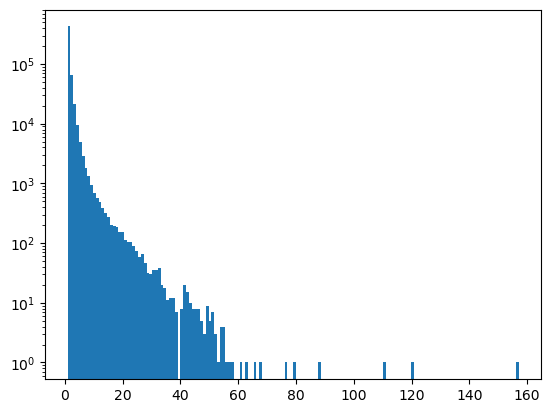

In [11]:
# Repreated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [12]:
new_df = df.iloc[:30000]
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [13]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [14]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk import PorterStemmer,SnowballStemmer,sent_tokenize,word_tokenize
from nltk.corpus import stopwords


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def text_preprocessing(q):
  """
  This function is used for text preprocessing
  """
  # strip()-> is used to remove space at the start and end of the text
  q = str(q).lower().strip()

  # Replace certain special characters with their string equivalents
  q = q.replace('@', 'at')
  q = q.replace('$', 'dollar')
  q = q.replace('₹', 'rupee') # to type rupee symbol press Ctrl,Alt and 4
  q = q.replace('€', 'euro')
  q = q.replace('%', 'percent')

  # The pattern '[math]' appears around 900 times in the whole dataset.
  q = q.replace('[math]', '')

  # Decontracting words

  contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'd've": "I would have",
        "I'll": "I will",
        "I'll've": "I will have",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so is",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",
    }

  q_decontracted =[]

  for word in q.split():
    if word in contractions:
      word = contractions[word]

    q_decontracted.append(word)

  q = ' '.join(q_decontracted)
  q = q.replace("'ve", " have")
  q = q.replace("n't", " not")
  q = q.replace("'re", " are")
  q = q.replace("''ll", " will")

  # Removing HTML tags
  pattern = re.compile('<.*?>')
  q = re.sub(pattern," ",q).strip()
  # q = BeautifulSoup(q)
  # q = q.get_text()

  # Remove punctuations
  pattern = re.compile('\W')
  q = re.sub(pattern, " ",q).strip()

  # applying stemming
  stemmer = SnowballStemmer(language='english' )
  q = stemmer.stem(q)

  # removing stopwords
  # stop_words = stopwords.words('english')
  # new_q = [word for word in q.split() if word not in stop_words]
  # q = " ".join(new_q)

  return q

In [17]:
new_df['question1'] = new_df['question1'].apply(text_preprocessing)
new_df['question2'] = new_df['question2'].apply(text_preprocessing)

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat,0


# Feature Extraction(adding new features)

In [19]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,57
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat,0,74,36


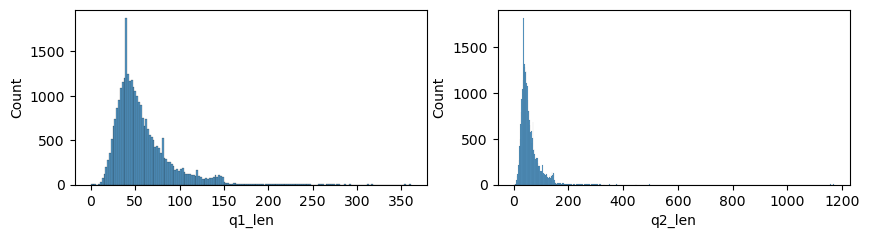

In [21]:
# create a figure object
fig = plt.figure(figsize=(10,5))

# add pubplots to the figure
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.histplot(new_df['q1_len'],ax=ax1)
sns.histplot(new_df['q2_len'],ax=ax2)

plt.show()

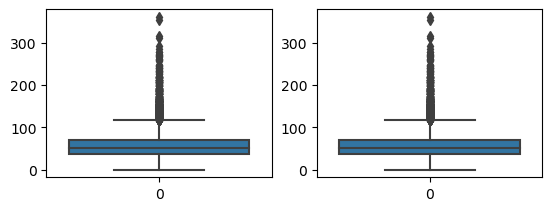

In [22]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
sns.boxplot(new_df['q1_len'],ax=ax1)
sns.boxplot(new_df['q1_len'],ax=ax2)
plt.show()

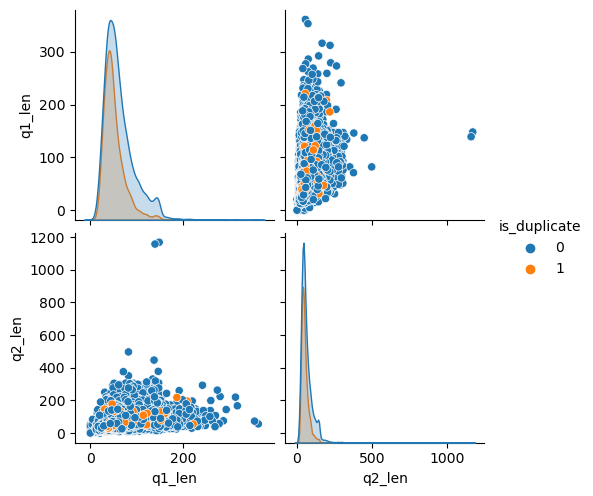

In [23]:
sns.pairplot(new_df[['q1_len', 'q2_len', 'is_duplicate']], hue='is_duplicate')


Insights:
1. Duplicate questions tend to have similar lengths and vice-versa
2. if the lengths of questions >500 they tend to be non-duplicate.
* so the extracted columns are useful.

In [24]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row:len(row.split()))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row:len(row.split()))

In [25]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,10,15
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,57,14,10
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,11,12
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat,0,74,36,13,7


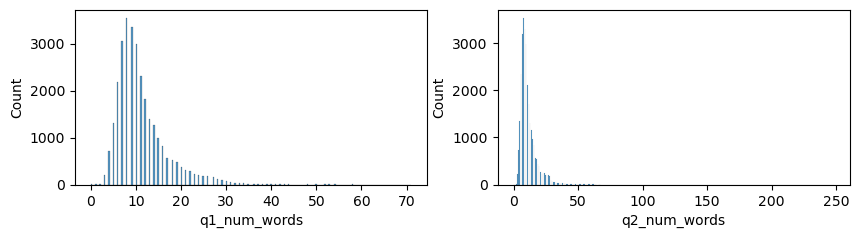

In [26]:
# create a figure object
fig = plt.figure(figsize=(10,5))

# add pubplots to the figure
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.histplot(new_df['q1_num_words'],ax=ax1)
sns.histplot(new_df['q2_num_words'],ax=ax2)

plt.show()

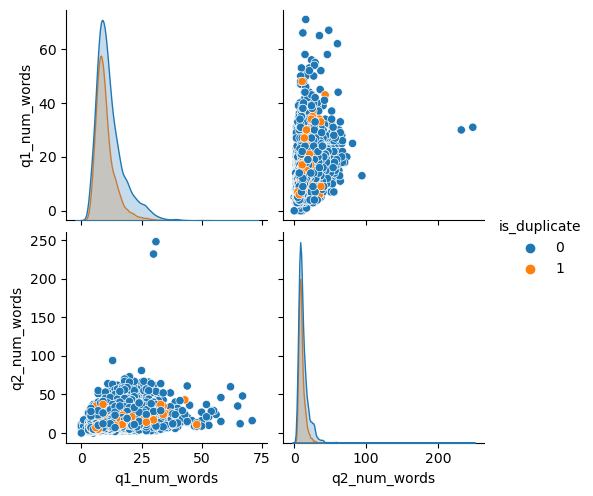

In [27]:
sns.pairplot(new_df[['q1_num_words','q2_num_words','is_duplicate']],hue='is_duplicate')

In [28]:
new_df['q1_num_words'].max()

71

In [29]:
new_df['q2_num_words'].max()

248

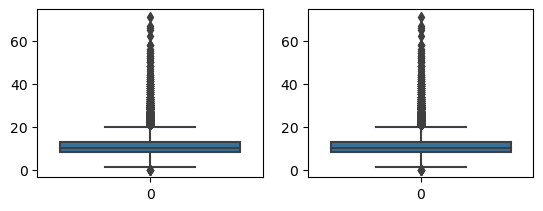

In [30]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
sns.boxplot(new_df['q1_num_words'],ax=ax1)
sns.boxplot(new_df['q1_num_words'],ax=ax2)
plt.show()

In [31]:
def common_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))

  return len(w1 & w2)

In [32]:
set(map(lambda word: word.lower().strip(),('Jayanth is the winner and is will be the next ceo').split(" ")))

{'and', 'be', 'ceo', 'is', 'jayanth', 'next', 'the', 'will', 'winner'}

In [33]:
new_df['common_words_len'] = new_df.apply(common_words,axis=1)

In [34]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words_len
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,10,15,8
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,57,14,10,4
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,11,12,1
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat,0,74,36,13,7,3


In [35]:
new_df.corr()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words_len
id,1.000000,0.921519,0.919435,-0.003698,-0.002660,0.002684,-0.004353,0.001569,0.001367
qid1,0.921519,1.000000,0.888068,-0.076825,0.010231,0.009254,0.007222,0.008514,-0.012306
qid2,0.919435,0.888068,1.000000,-0.072677,0.006567,0.014771,0.003169,0.013336,-0.014891
is_duplicate,-0.003698,-0.076825,-0.072677,1.000000,-0.181316,-0.161783,-0.167182,-0.161190,0.185597
q1_len,-0.002660,0.010231,0.006567,-0.181316,1.000000,0.480271,0.962359,0.457673,0.363997
q2_len,0.002684,0.009254,0.014771,-0.161783,0.480271,1.000000,0.463560,0.972119,0.368388
q1_num_words,-0.004353,0.007222,0.003169,-0.167182,0.962359,0.463560,1.000000,0.472999,0.379443
q2_num_words,0.001569,0.008514,0.013336,-0.161190,0.457673,0.972119,0.472999,1.000000,0.366284
common_words_len,0.001367,-0.012306,-0.014891,0.185597,0.363997,0.368388,0.379443,0.366284,1.000000


insight: common_words_len column has positive correlation of 0.19 with is duplicate column

<Axes: xlabel='common_words_len', ylabel='Count'>

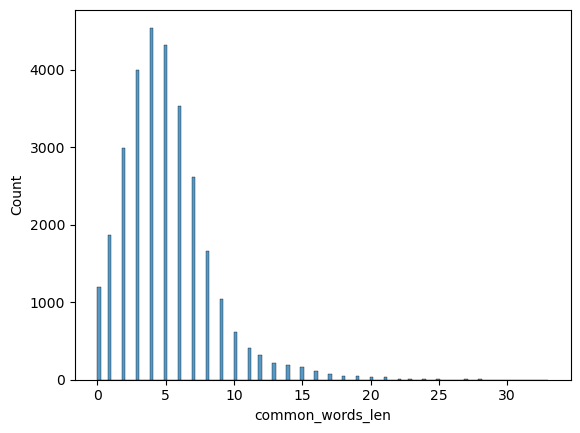

In [36]:
sns.histplot(new_df['common_words_len'])

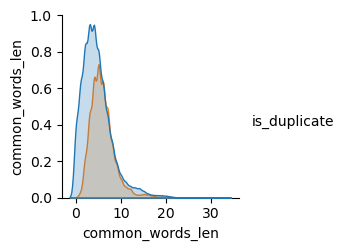

In [37]:
sns.pairplot(new_df[['common_words_len',  'is_duplicate']],hue='is_duplicate')

In [38]:
def total_words(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [39]:
new_df['word_total'] =   new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words_len,word_total
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,10,15,8,26
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,57,14,10,4,24
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,11,12,1,22
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat,0,74,36,13,7,3,21


In [40]:
new_df['word_share'] =  round(new_df['common_words_len']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words_len,word_total,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,11,23,0.48
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,10,15,8,26,0.31
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,57,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,11,12,1,22,0.05
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat,0,74,36,13,7,3,21,0.14


## Advanced Feature engineering

### 1. Token Features

* **cwc_min:** This is the ratio of common words to minimum length of words between questions.

* **cwc_max:** bold text This is the ratio of common words to maximum length of words between questions.

* **csc_min:** This is the ratio of the number of common stop words to the minimum stop word length between the questions.

* **csc_max:** This is the ratio of the number of common stop words to the maximum stop word length between the questions.

* **ctc_min:** This is the ratio of the number of common token to minimum token count between the questions.

* **ctc_max:** This is the ratio of the number of common token to maximum token count between the questions.

* **last_word_eq:** 1 if the last word in the two questions is same, 0 otherwise.

* **first_word_eq:** 1 if the first word in the two questions is same, 0 otherwise.

In [41]:
def fetch_token_features(row):

  q1 = row['question1']
  q2 = row['question2']

  SAFE_DIV = 0.0001

  STOP_WORDS = stopwords.words('english')

  token_features = [0.0]*8

  # Converting the sentence into Tokens:
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens)==0 or len(q2_tokens)==0:
    return token_features

  # Get the non-stopwords in Questions
  q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

  # Get the stopwords in Questions
  q1_stops = set([word for word in q1_tokens if word  in STOP_WORDS])
  q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

  # Get the common non-stopwords in Questions
  common_word_count = len(q1_words.intersection(q2_words))

  # Get the common stopwords in questions
  common_stop_count = len(q1_stops.intersection(q2_stops))

  # Get the common Tokens from Question pair
  common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))\

  token_features[0] = common_word_count/ (min(len(q1_words),len(q2_words)) + SAFE_DIV)
  token_features[1] = common_word_count/ (max(len(q1_words),len(q2_words)) + SAFE_DIV)
  token_features[2] = common_stop_count/ (min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
  token_features[3] = common_stop_count/ (max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
  token_features[4] = common_token_count/ (min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
  token_features[5] = common_token_count/ (max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)

  # Last word of both question is same or not
  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

  # first word of both question is same or not
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])

  return token_features


In [42]:
token_features = new_df.apply(fetch_token_features,axis=1)

In [43]:
new_df['cwc_min']  = list(map(lambda x:x[0], token_features))
new_df['cwc_max']  = list(map(lambda x:x[1], token_features))
new_df['csc_min']  = list(map(lambda x:x[2], token_features))
new_df['csc_max']  = list(map(lambda x:x[3], token_features))
new_df['ctc_min']  = list(map(lambda x:x[4], token_features))
new_df['ctc_max']  = list(map(lambda x:x[5], token_features))
new_df['last_word_eq']  = list(map(lambda x:x[6], token_features))
new_df['first_word_eq']  = list(map(lambda x:x[7], token_features))

In [44]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,23,0.48,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,10,15,...,26,0.31,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,57,14,10,...,24,0.17,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,11,12,...,22,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat,0,74,36,13,7,...,21,0.14,0.199996,0.099999,0.999950,0.666644,0.428565,0.230767,0.0,1.0


### 2. Length Based Features

* **mean_len:** Mean of the length of the two questions(number of words)

* **abs_len_diff:** Absolute difference between the length of the two questions(number of words)

* **longest_substr_ratio:** Ratio of the length of the longest substring among the two questions to the length of the smaller question



In [45]:
!pip install Distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=b1054d68865d79d5d4738400d9c6216e1fca7036d198449536b485d8f9cad418
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built Distance


In [46]:
import distance

def fetch_length_features(row):

  q1 = row['question1']
  q2 = row['question2']


  length_features = [0.0]*3

  # Converting the sentence into Tokens:
  q1_tokens = q1.split()
  q2_tokens = q2.split()

  if len(q1_tokens)==0 or len(q2_tokens)==0:
    return length_features

  # Average token length of both questions
  length_features[0] = (len(q1_tokens) + len(q2_tokens))/2

  # Absolute length features
  length_features[1] = abs(len(q1_tokens) - len(q2_tokens))

  # Substring length feature
  strs = list(distance.lcsubstrings(q1,q2))
  length_features[2] = len(strs[0]) / (min(len(q1),len(q2)) + 1)

  return length_features


In [47]:
length_features = new_df.apply(fetch_length_features,axis=1)

In [48]:
new_df['mean_len'] = list(map(lambda x:x[0], length_features))
new_df['abs_len_diff'] = list(map(lambda x:x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x:x[2], length_features))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,mean_len,abs_len_diff,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,13.0,2.0,0.982456
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,10,15,...,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,12.5,5.0,0.588235
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,57,14,10,...,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,12.0,4.0,0.172414
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,11,12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11.5,1.0,0.040000
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat,0,74,36,13,7,...,0.099999,0.999950,0.666644,0.428565,0.230767,0.0,1.0,10.0,6.0,0.162162


In [49]:
new_df.apply(lambda new_df: min(new_df['q1_len'],new_df['q2_len']),axis=1).values

array([56, 50, 57, ..., 26, 43, 22])

### 3. Fuzzy Features

* **fuzz_QRatio:** fuzz_ratio is the similarity score based on leveshitein distance.
> **Levenshtein distance:** measures the minnimum number of single=character edits( insertions, delections, or substitutions) required to transform one string into another.

* **fuzz_ratio:**  It is 90% same as fuzz_qratio but it is case sensitive(uppercase vs lowercase). below is the example

* **fuzz_partial_ratio:**  is a way to measure how similar two strings are by considering the best matching part between them.It's like finding the most similar part in both the sentences.

* **token_sort_ratio:** is a way to measure how similar two strings are after sorting the words in each string. I works by tokenizing the sentences into words, sorting the words in each sentence, and then calculating the similarity between the sorted sentences.

* **token_set_ratio:** measures the similarity between two sentences based on their token sets, considering common words while allowing for differences in word order, missing words, or repeated words.

In [50]:
!pip install fuzzywuzzy
import fuzzywuzzy

In [51]:
from fuzzywuzzy import fuzz

string1 = "Hello World"
string2 = "hello world"

# Using fuzz.ratio
ratio_score = fuzz.ratio(string1, string2)
print("fuzz.ratio:", ratio_score)  # Output: fuzz.ratio: 74

# Using fuzz.QRatio
q_ratio_score = fuzz.QRatio(string1, string2)
print("fuzz.QRatio:", q_ratio_score)  # Output: fuzz.QRatio: 100


fuzz.ratio: 82
fuzz.QRatio: 100


In [52]:
from fuzzywuzzy import fuzz

# Example sentences
sentence1 = "I like eating pizza."
sentence2 = "Eating pizza is fun."

# above the best matching part is "eating pizza"

# Calculate the partial ratio between the two sentences
partial_ratio = fuzz.partial_ratio(sentence1, sentence2)

# Print the result
print("Partial Ratio:", partial_ratio)


Partial Ratio: 60


In [53]:
from fuzzywuzzy import fuzz

# Example sentences
sentence1 = "I love pizza"
sentence2 = "Pizza is lovely"

# Tokenize and sort the words in each sentence
sorted_sentence1 = " ".join(sorted(sentence1.lower().split()))
sorted_sentence2 = " ".join(sorted(sentence2.lower().split()))

# Calculate the token sort ratio between the two sentences
token_sort_ratio = fuzz.token_sort_ratio(sorted_sentence1, sorted_sentence2)

# Print the result
print("Token Sort Ratio:", token_sort_ratio)


Token Sort Ratio: 89


In [54]:
sorted_sentence1,sorted_sentence2

('i love pizza', 'is lovely pizza')

In [55]:
from fuzzywuzzy import fuzz

# Example sentences
sentence1 = "I love pizza and pasta"
sentence2 = "Pizza is lovely, and I also love pasta"

# Tokenize the sentences into individual words (tokens)
tokens_sentence1 = sentence1.lower().split()
tokens_sentence2 = sentence2.lower().split()

# Calculate the token set ratio between the two sentences
token_set_ratio = fuzz.token_set_ratio(sentence1, sentence2)

# Print the tokens and the result
print("Tokens in Sentence 1:", tokens_sentence1)
print("Tokens in Sentence 2:", tokens_sentence2)
print("Token Set Ratio:", token_set_ratio)


Tokens in Sentence 1: ['i', 'love', 'pizza', 'and', 'pasta']
Tokens in Sentence 2: ['pizza', 'is', 'lovely,', 'and', 'i', 'also', 'love', 'pasta']
Token Set Ratio: 100


In [56]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

  q1 = row['question1']
  q2 = row['question2']

  fuzzy_features = [0.0]*4

  # fuzz_ratio
  fuzzy_features[0] = fuzz.QRatio(q1,q2)

  # fuzz_partial_ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

  # token_sort_ratio
  fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

  # token_set_ratio
  fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

  return fuzzy_features

In [57]:
fuzzy_features = new_df.apply(fetch_fuzzy_features,axis=1)

In [58]:
new_df['fuzz_ratio'] = list(map(lambda x:x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x:x[1], fuzzy_features))
new_df['fuzz_sort_ratio'] = list(map(lambda x:x[2], fuzzy_features))
new_df['fuzz_set_ratio'] = list(map(lambda x:x[3], fuzzy_features))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,mean_len,abs_len_diff,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,65,56,14,12,...,0.785709,0.0,1.0,13.0,2.0,0.982456,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,50,87,10,15,...,0.466664,0.0,1.0,12.5,5.0,0.588235,66,74,63,86
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,72,57,14,10,...,0.285712,0.0,1.0,12.0,4.0,0.172414,54,54,67,67
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,49,58,11,12,...,0.000000,0.0,0.0,11.5,1.0,0.040000,36,39,37,36
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat,0,74,36,13,7,...,0.230767,0.0,1.0,10.0,6.0,0.162162,44,53,44,53


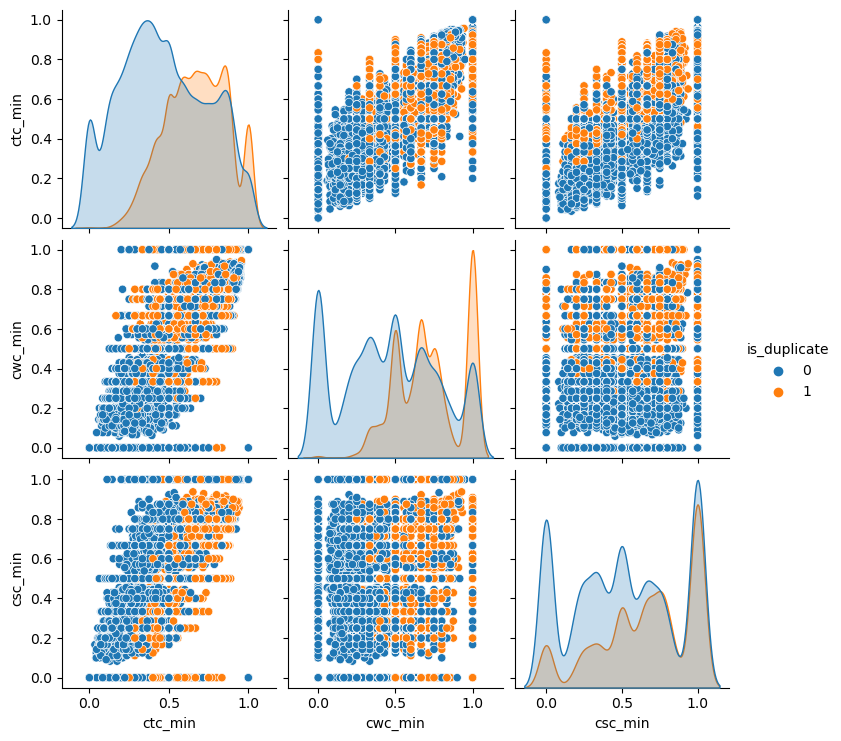

In [59]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

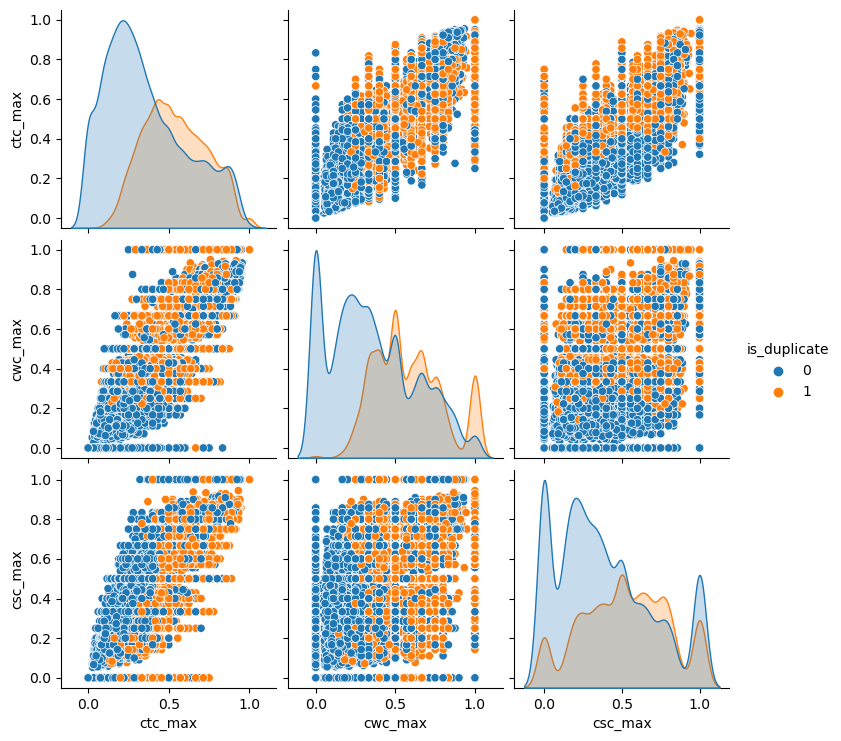

In [60]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

**Insight:** in the diagonal graphs we can clearly see the differnce in the graphs of
the duplicate and non duplicate questions. This increases the probability of those
features to contibute for accuracy increases

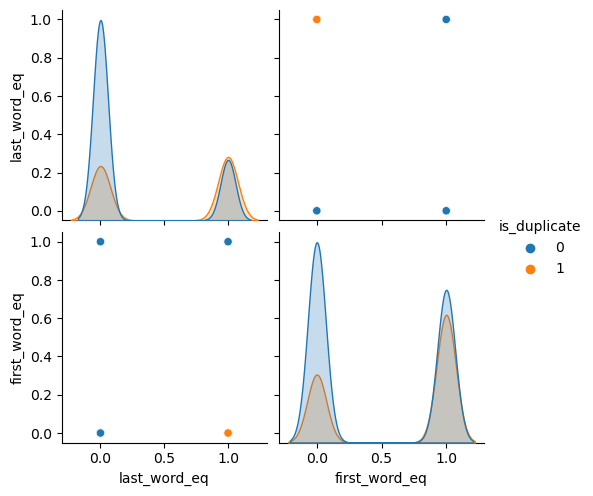

In [61]:
sns.pairplot(new_df[[ 'last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate');

**Insight:** we can clearly observe that if the first_word or last_word of two question are matching
then there is high probability that given questions are duplicate.

In [62]:
#sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')

observation: Both mean_len and abs_len_diff are not that useful features. Longest substring_ratio is helpful

In [63]:
#sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','fuzz_sort_ratio','fuzz_set_ratio','is_duplicate']],hue='is_duplicate')

In [64]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'common_words_len',
       'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'mean_len',
       'abs_len_diff', 'longest_substr_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'fuzz_sort_ratio', 'fuzz_set_ratio'],
      dtype='object')

In [65]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimenstion

# from sklearn.preprocessing import MinMaxScaler

# x = MinMaxScaler().fit_transform(new_df[['cwc_min','cwc_max',
#                                          'csc_min','csc_max',
#                                          'ctc_min','ctc_max',
#                                          'last_word_eq','first_word_eq',
#                                          'mean_len','abs_len_diff',
#                                          'longest_substr_ratio','fuzz_ratio',
#                                          'fuzz_partial_ratio','fuzz_sort_ratio',
#                                          'fuzz_set_ratio']])
# y = new_df['is_duplicate'].values

In [66]:
# x

In [67]:
from sklearn.manifold import TSNE

In [68]:
# tsne3d = TSNE(
#     n_components=3,
#     init='random',# pca
#     random_state=101,
#     method='barnes_hut',
#     n_iter=250,
#     verbose=2,
#     angle=0.5
# ).fit_transform(x)

In [69]:
# import plotly.graph_objects as go
# import plotly.offline as py
# # Create a DataFrame to hold the t-SNE results and 'is_duplicate' column
# tsne_df = pd.DataFrame(data=tsne3d, columns=['TSNE_1', 'TSNE_2', 'TSNE_3'])
# tsne_df['is_duplicate'] = new_df['is_duplicate']

# # Create a 3D scatter plot using Plotly
# trace1 = go.Scatter3d(
#     x=tsne_df['TSNE_1'],
#     y=tsne_df['TSNE_2'],
#     z=tsne_df['TSNE_3'],
#     mode='markers',
#     marker=dict(
#         size=5,
#         color=y,  # Color points based on the 'is_duplicate' column
#         colorscale='Portland',  # Choose the colorscale
#         opacity=0.75,
#         colorbar = dict(title='duplicate'),
#         line=dict(color='rgb(255,255,255)')
#     )
# )

# # # Add axis labels
# # fig.update_layout(scene=dict(xaxis_title='TSNE_1', yaxis_title='TSNE_2', zaxis_title='TSNE_3'))

# # # Show the plot
# # fig.show()
# data = [trace1]
# layout = dict(height=800, width =800, title='3d embedding with engineered features')
# fig = dict(data = data, layout = layout)
# py.iplot(fig,filename='3DBubble')

Conclusion: The created features will be helpful during modelling phase

In [70]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...
4,which one dissolve in water quikly sugar salt...,which fish would survive in salt wat


In [71]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words_len,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,mean_len,abs_len_diff,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0.785709,0.0,1.0,13.0,2.0,0.982456,93,100,93,100
1,0,50,87,10,15,8,26,0.31,0.799984,0.399996,...,0.466664,0.0,1.0,12.5,5.0,0.588235,66,74,63,86
2,0,72,57,14,10,4,24,0.17,0.399992,0.333328,...,0.285712,0.0,1.0,12.0,4.0,0.172414,54,54,67,67
3,0,49,58,11,12,1,22,0.05,0.000000,0.000000,...,0.000000,0.0,0.0,11.5,1.0,0.040000,36,39,37,36
4,0,74,36,13,7,3,21,0.14,0.199996,0.099999,...,0.230767,0.0,1.0,10.0,6.0,0.162162,44,53,44,53


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

q1_arr , q2_arr = np.vsplit(tfidf.fit_transform(questions).toarray(),2)

In [73]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape


(30000, 6000)

In [74]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words_len,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,65,56,14,12,11,23,0.48,0.999980,0.833319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,50,87,10,15,8,26,0.31,0.799984,0.399996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,72,57,14,10,4,24,0.17,0.399992,0.333328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,49,58,11,12,1,22,0.05,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,74,36,13,7,3,21,0.14,0.199996,0.099999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
final_df.duplicated().sum()

20

In [76]:
final_df.columns = final_df.columns.astype(str)

In [77]:
final_df.drop_duplicates(inplace=True)

In [84]:
final_df.duplicated().sum()

0

In [79]:
x = final_df.iloc[:,1:]
#y = final_df.iloc[:,0]

In [80]:
y = final_df.iloc[:,0]
y

0        0
1        0
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: is_duplicate, Length: 29980, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7841894596397598

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# xgb.fit(x_train,y_train)
# y_pred = xgb.predict(x_test)
# accuracy_score(y_test,y_pred)

In [86]:
# for col in final_df.columns:
#     print(repr(col))